**PENGOLAHAN DATA (KECEPATAN PECULIAR GALAKSI DAN SELEKSI BENSBY)**_TA GISHELAWATI 10319046


Kecepatan Peculiar Galaksi

U = komponen kecepatan ruang ke arah pusat galaksi (radial)

V = komponen kecepatan ruang ke arah rotasi galaksi

W = komponen kecepatan ruang ke arah kutub galaksi (tegak lurus)



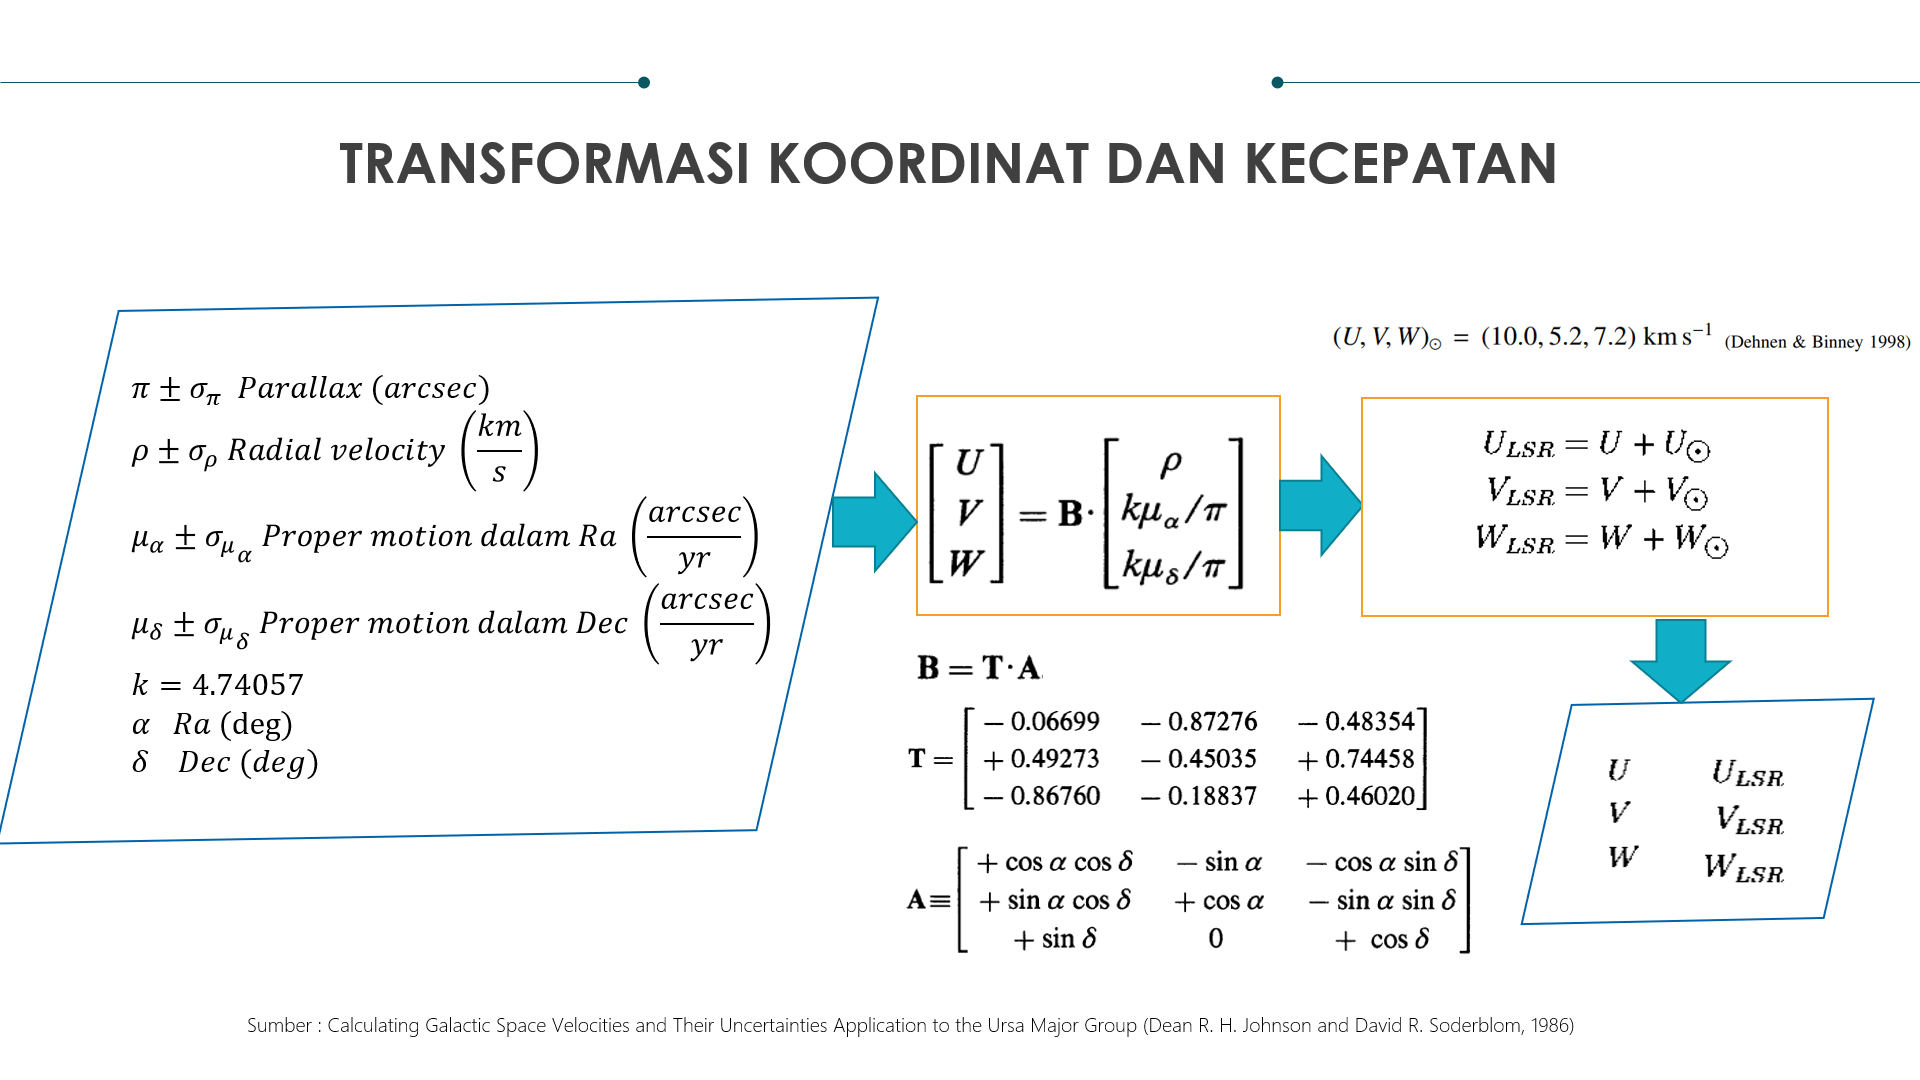

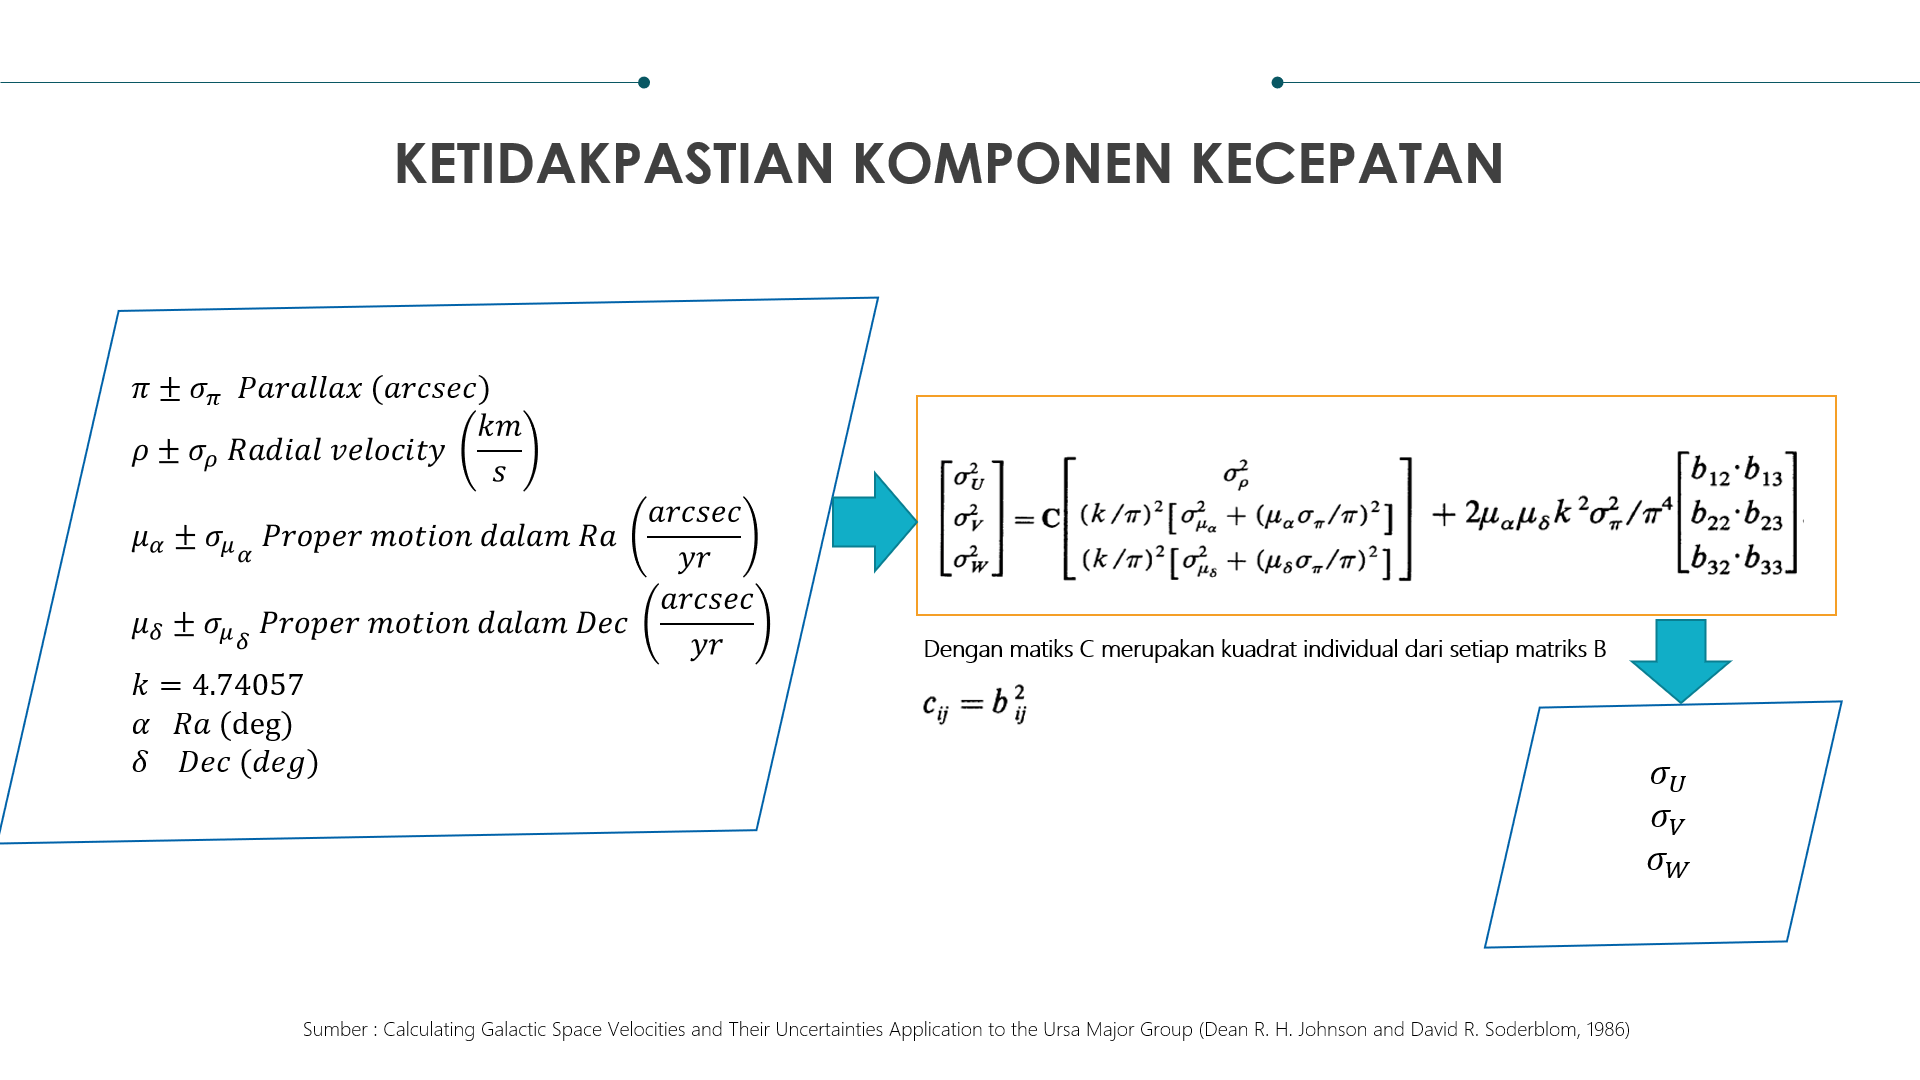

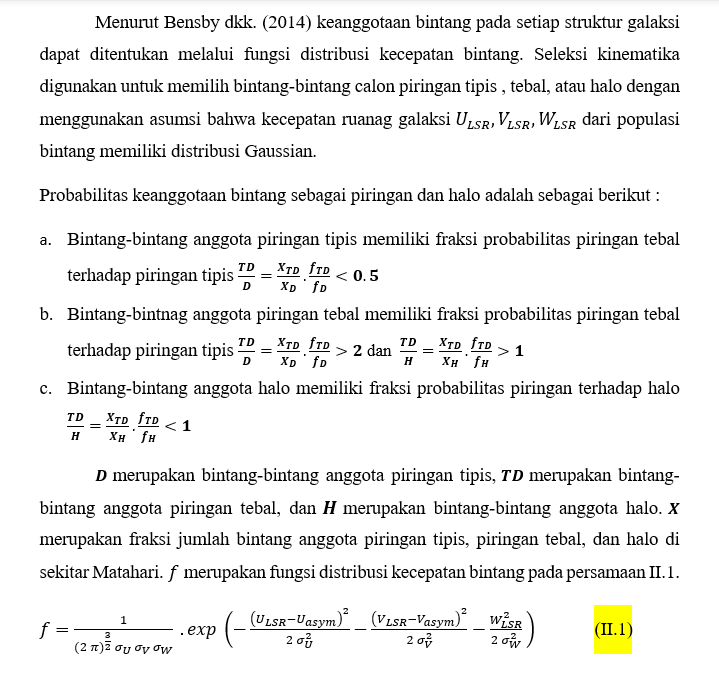

In [ ]:
### 1. IMPORT LIBRARY PHYTON
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datas
import math
from pandas.core.frame import DataFrame

In [ ]:
### 2. MEMBACA DATA BERSIH
data = pd.read_csv('2_DataClean.csv')

In [ ]:
#### 3. MENGHITUNG UVW GALAKSI DAN GALLATNYA

## A. Menghitung Nilai Cosinus RA dan Dec
# menambahkan kolom baru cos RA
data['cos_RA'] = data['RAJ2000'].apply(lambda x:math.cos(math.radians(x)))
# menambahkan kolom baru cos DE
data['cos_DE'] = data['DEJ2000'].apply(lambda x:math.cos(math.radians(x)))
# menambahkan kolom baru sin RA
data['sin_RA'] = data['RAJ2000'].apply(lambda x:math.sin(math.radians(x)))
# menambahkan kolom baru cos DE
data['sin_DE'] = data['DEJ2000'].apply(lambda x:math.sin(math.radians(x)))

In [ ]:
## B. Mendefinisikan Fungsi UVW dan Gallatnya
def U (cosra, cosdec, sinra, sindec, RV, pmra, pmdec, parallax):
  B11 = (-0.06699*cosra*cosdec)+(- 0.87276*sinra*cosdec)+(- 0.48354*sindec)
  B12 = (-0.06699*-sinra)+(- 0.87276*cosra)+(- 0.48354*0)
  B13 = (-0.06699*-cosra*sindec)+(-0.87276*-sinra*sindec)+(- 0.48354*cosdec)
  A1 = RV
  A2 = 4.74057*pmra/parallax
  A3 = 4.74057*pmdec/parallax
  U_g = (B11*A1) + (B12*A2) + (B13*A3)
  return U_g

def V (cosra, cosdec, sinra, sindec, RV, pmra, pmdec, parallax):
  B21 = (0.49273*cosra*cosdec)+(- 0.45035 *sinra*cosdec)+(0.74458*sindec)
  B22 = (0.49273*-sinra)+(- 0.45035*cosra)+(0.74458*0)
  B23 = (0.49273*-cosra*sindec)+(- 0.45035*-sinra*sindec)+(0.74458*cosdec)
  A1 = RV
  A2 = 4.74057*pmra/parallax
  A3 = 4.74057*pmdec/parallax
  V_g = (B21*A1) + (B22*A2) + (B23*A3)
  return V_g

def W (cosra, cosdec, sinra, sindec, RV, pmra, pmdec, parallax):
  B31 = (- 0.86760 *cosra*cosdec)+(- 0.18837*sinra*cosdec)+(0.46020*sindec)
  B32 = (- 0.86760*-sinra)+(- 0.18837*cosra)+(0.46020*0)
  B33 = (- 0.86760*-cosra*sindec)+(- 0.18837*-sinra*sindec)+(0.46020*cosdec)
  A1 = RV
  A2 = 4.74057*pmra/parallax
  A3 = 4.74057*pmdec/parallax
  W_g = (B31*A1) + (B32*A2) + (B33*A3)
  return W_g

def gal_U (cosra, cosdec, sinra, sindec, RV, eRV, pmra, epmra, pmdec, epmdec, parallax, eparallax):
  B11 = (-0.06699*cosra*cosdec)+(- 0.87276*sinra*cosdec)+(- 0.48354*sindec)
  B12 = (-0.06699*-sinra)+(- 0.87276*cosra)+(- 0.48354*0)
  B13 = (-0.06699*-cosra*sindec)+(-0.87276*-sinra*sindec)+(- 0.48354*cosdec)
  C11 = B11**2
  C12 = B12**2
  C13 = B13**2
  D1 = eRV**2
  D2 = ((4.74057/parallax)**2)*((epmra**2)+(pmra*eparallax/parallax)**2)
  D3 = ((4.74057/parallax)**2)*((epmdec**2)+(pmdec*eparallax/parallax)**2)
  K= 2*pmra*pmdec*((4.74057)**2)*((eparallax)**2)/(parallax)**4
  E1 = B12*B13
  gal_U_g = (((C11*D1)+(C12*D2)+(C13*D3)) + (K*E1))**(1/2)
  return gal_U_g

def gal_V (cosra, cosdec, sinra, sindec, RV, eRV, pmra, epmra, pmdec, epmdec, parallax, eparallax):
  B21 = (0.49273*cosra*cosdec)+(- 0.45035 *sinra*cosdec)+(0.74458*sindec)
  B22 = (0.49273*-sinra)+(- 0.45035*cosra)+(0.74458*0)
  B23 = (0.49273*-cosra*sindec)+(- 0.45035*-sinra*sindec)+(0.74458*cosdec)
  C21 = B21**2
  C22 = B22**2
  C23 = B23**2
  D1 = eRV**2
  D2 = ((4.74057/parallax)**2)*((epmra**2)+(pmra*eparallax/parallax)**2)
  D3 = ((4.74057/parallax)**2)*((epmdec**2)+(pmdec*eparallax/parallax)**2)
  E2 = B22*B23
  K= 2*pmra*pmdec*((4.74057)**2)*((eparallax)**2)/(parallax)**4
  gal_V_g = (((C21*D1)+(C22*D2)+(C23*D3)) + (K*E2))**(1/2)
  return gal_V_g

def gal_W (cosra, cosdec, sinra, sindec, RV, eRV, pmra, epmra, pmdec, epmdec, parallax, eparallax):
  B31 = (- 0.86760 *cosra*cosdec)+(- 0.18837*sinra*cosdec)+(0.46020*sindec)
  B32 = (- 0.86760*-sinra)+(- 0.18837*cosra)+(0.46020*0)
  B33 = (- 0.86760*-cosra*sindec)+(- 0.18837*-sinra*sindec)+(0.46020*cosdec)
  C31 = B31**2
  C32 = B32**2
  C33 = B33**2
  D1 = eRV**2
  D2 = ((4.74057/parallax)**2)*((epmra**2)+(pmra*eparallax/parallax)**2)
  D3 = ((4.74057/parallax)**2)*((epmdec**2)+(pmdec*eparallax/parallax)**2)
  E3 = B32*B33
  K= 2*pmra*pmdec*((4.74057)**2)*((eparallax)**2)/(parallax)**4
  gal_W_g = (((C31*D1)+(C32*D2)+(C33*D3)) + (K*E3))**(1/2)
  return gal_W_g

In [ ]:
## C. Menentukan nilai U,V,W dan menyimpannya
data['U'] = U (data['cos_RA'], data['cos_DE'], data['sin_RA'], data['sin_DE'],
               data['RV'], data['pmra'], data['pmde'], data['parallax'])
data['V'] = V (data['cos_RA'], data['cos_DE'], data['sin_RA'], data['sin_DE'],
               data['RV'], data['pmra'], data['pmde'], data['parallax'])
data['W'] = W (data['cos_RA'], data['cos_DE'], data['sin_RA'], data['sin_DE'],
               data['RV'], data['pmra'], data['pmde'], data['parallax'])

## D. Menentukan gallat U,V,W dan menyimpannya
data['gal_U'] = gal_U (data['cos_RA'], data['cos_DE'], data['sin_RA'],
                       data['sin_DE'], data['RV'], data['e_RV'],
                       data['pmra'], data['e_pmra'], data['pmde'],
                       data['e_pmdec'], data['parallax'], data['e_parallax'])

data['gal_V'] = gal_V (data['cos_RA'], data['cos_DE'], data['sin_RA'],
                       data['sin_DE'], data['RV'], data['e_RV'],
                       data['pmra'], data['e_pmra'], data['pmde'],
                       data['e_pmdec'], data['parallax'], data['e_parallax'])

data['gal_W'] = gal_W (data['cos_RA'], data['cos_DE'], data['sin_RA'],
                       data['sin_DE'], data['RV'], data['e_RV'],
                       data['pmra'], data['e_pmra'], data['pmde'],
                       data['e_pmdec'], data['parallax'], data['e_parallax'])


In [ ]:
### 4. MENGHITUNG UVW GALAKSI KOREKSI LSR MATAHARI
## A. Menambahkan UVW koreksi LSR
data['U_LSR'] = data['U'].apply(lambda x:x+10)
data['V_LSR'] = data['V'].apply(lambda x:x+5.2)
data['W_LSR'] = data['W'].apply(lambda x:x+7.2)

In [ ]:
### 5. MENGHITUNG VdelE DAN GALLAT (SEBANDING DENGAN EKSENTRISITAS ORBIT)
def VdelE (U,V):
  A1 = (U**2 + (2*(V**2)))**(1/2)
  return A1
def gal_VdelE (U,V,gal_U,gal_V):
  B1 = ((((U**2)*(gal_U**2))+(4*(V**2)*(gal_V**2)))/((U**2)+(2*(V**2))))**(1/2)
  return B1
data['VdelE'] = VdelE(data['U'], data['V'])
data['gal_VdelE'] = gal_VdelE(data['U'], data['V'], data['gal_U'], data['gal_V'])

In [ ]:
### 6. MENGHITUNG VdelE KOREKSI LSR MATAHARI (SEBANDING DENGAN EKSENTRISITAS ORBIT)
def VdelELSR (U_LSR,V_LSR):
   A2 = (U_LSR**2 + (2*(V_LSR**2)))**(1/2)
   return A2
data['VdelELSR'] = VdelELSR (data['U_LSR'], data['V_LSR'])

In [ ]:
### 7. MEMOTONG NILAI U,V, W pada rentang -350 < x < 350 (Bajkova & Bobylev)
data = data.drop(data[(data['U'] <= -350) | (data['U'] >= 350)].index)
data = data.drop(data[(data['V'] <= -350) | (data['V'] >= 350)].index)
data = data.drop(data[(data['W'] <= -350) | (data['W'] >= 350)].index)
data

,class,subclass,z,z_err,wd_subclass,teff,teff_err,DR3Name,Plx,e_Plx,...,W,gal_U,gal_V,gal_W,U_LSR,V_LSR,W_LSR,VdelE,gal_VdelE,VdelELSR
0,STAR,WD,0.000323,0.000009,DA,14070.30,215.59,Gaia DR3 2683213511743993472,7.3350,0.1233,...,-61.552810,0.971165,1.904021,1.828317,32.479212,77.558490,-54.352810,104.770307,2.638226,114.392036
1,STAR,WD,0.000224,0.000019,DAZ,31752.75,252.62,Gaia DR3 3445599202110473856,8.5128,0.2290,...,-6.788036,5.686954,1.306176,0.365376,-58.299104,-40.381106,0.411964,93.915079,4.325780,81.609148
3,STAR,WD,0.000870,0.000031,DA,-9999.00,-9999.00,Gaia DR3 3384342110790964608,0.6692,0.0209,...,15.851252,9.006396,1.338176,1.581366,-246.810039,-46.470755,23.051252,267.003989,8.678010,255.409979
4,STAR,WD,-0.000499,0.000026,DAZ,19173.87,589.58,Gaia DR3 364169452395186304,3.3586,0.1328,...,76.670383,3.909203,5.831443,3.459185,63.660324,-113.808085,83.870383,176.650160,7.946439,173.081476
5,STAR,WD,-0.000271,0.000026,DA,21850.81,843.92,Gaia DR3 115671578180163072,4.9894,0.1295,...,39.230787,6.451519,2.766211,3.359257,67.386613,-42.524631,46.430787,88.591783,5.132928,90.319677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,STAR,WD,-0.000144,0.000010,DA,12709.27,306.86,Gaia DR3 1327673970012272384,2.9023,0.1282,...,-17.207069,2.249524,2.071678,2.107499,-49.487848,-7.645063,-10.007069,62.199641,2.315358,50.655119
2821,STAR,WD,-0.000698,0.000045,DA,21249.47,1106.68,Gaia DR3 1594684149704177408,3.6237,0.1774,...,-155.090151,1.334940,8.075185,10.822018,1.703752,-137.124087,-147.890151,201.447559,11.410480,193.930228
2822,STAR,WD,0.000492,0.000027,DA,12000.00,234.38,Gaia DR3 1595361959967883648,3.3874,0.1713,...,114.515905,0.765026,5.156828,6.347628,27.878876,96.657475,121.715905,130.570263,7.224923,139.508303
2823,STAR,WD,0.000067,0.000006,DA,16920.32,82.66,Gaia DR3 1599634185412296064,6.8827,0.0493,...,-5.866712,0.291298,1.073034,1.343770,-29.131327,47.041048,1.333288,70.940871,1.275913,72.624751


In [ ]:
### 8. SELEKSI BENSBY
## A. Karakteristik populasi bintang disekitar Matahari oleh Bensby,dkk
#Secara berurutan dari thin disk, thick disk, dan halo
sigma_u = [35,67,160]
sigma_v = [20,38,90]
sigma_w = [16,35,90]
u_asym = [0,0,0]
v_asym = [-15,-46,-220]
fraksi = [0.85,0.09,0.0015]

## B. Menghitung nilai konstanta
# Menentukan nilai konstatanta 1/(((2 π)^(3/2)) * σ_U * σ_V * σ_W )
kd = 1 / (((2*np.pi) **1.5) *sigma_u[0] *sigma_v[0] *sigma_w[0]) #thin disk
ktd = 1 / (((2*np.pi) **1.5) *sigma_u[1] *sigma_v[1] *sigma_w[1]) #thick disk
kh = 1 / (((2*np.pi) **1.5) *sigma_u[2] *sigma_v[2] *sigma_w[2]) #halo

## C. Menentukan nilai-nilai suku didalam exponen
# thin disk
d1 = -(((data['U_LSR']-u_asym[0])**2)/(2*sigma_u[0]**2))
d2 = -(((data['V_LSR']-v_asym[0])**2)/(2*sigma_v[0]**2))
d3 = -(((data['W_LSR'])**2)/(2*sigma_w[0]**2))
# thickdisk
td1 = -(((data['U_LSR']-u_asym[1])**2)/(2*sigma_u[1]**2))
td2 = -(((data['V_LSR']-v_asym[1])**2)/(2*sigma_v[1]**2))
td3 = -(((data['W_LSR'])**2)/(2*sigma_w[1]**2))
# halo
h1 = -(((data['U_LSR']-u_asym[2])**2)/(2*sigma_u[2]**2))
h2 = -(((data['V_LSR']-v_asym[2])**2)/(2*sigma_v[2]**2))
h3 = -(((data['W_LSR'])**2)/(2*sigma_w[2]**2))

## D. Menentukan fraksi
fd = kd * np.exp(d1 + d2 + d3) #thin disk
ftd= ktd* np.exp(td1 + td2 + td3) #thick disk
fh = kh * np.exp(h1 + h2 + h3) #halo

## E. Probabilitas Relatif
tdd = (fraksi[1] / fraksi[0]) * (ftd/fd) #TD/D=(XTD/XD)*(fTD/fD)
tdh = (fraksi[1] / fraksi[2]) * (ftd/fh) #TD/H=(XTD/XH)*(fTD/fH)

## F. Menyimpan data yang telah diseleksi dan data keseluruhan
thin = data[tdd < 0.5].to_csv ('thin.csv', index = None, header=True)
thick = data[(tdd > 2)&(tdh >= 1)].to_csv ('thick.csv', index = None, header=True)
halo = data[tdh < 1 ].to_csv ('halo.csv', index = None, header=True)
bukan = data[(tdd > 0.5) & (tdd < 2) &(tdh >= 1)].to_csv ('yanglain.csv', index = None, header=True)
data.to_csv('all.csv', index=False)

In [ ]:
### 9. Melihat data
## A. Halo
dfh = pd.read_csv('halo.csv')
dfh

,class,subclass,z,z_err,wd_subclass,teff,teff_err,DR3Name,Plx,e_Plx,...,W,gal_U,gal_V,gal_W,U_LSR,V_LSR,W_LSR,VdelE,gal_VdelE,VdelELSR
0,STAR,WD,0.000608,0.000020,DAZ,31340.74,140.80,Gaia DR3 2844723867126003840,4.7256,0.0465,...,-114.085540,0.941271,5.006428,3.111245,-55.204974,139.896331,-106.885540,201.340239,6.705519,205.400964
1,STAR,WD,-0.000662,0.000044,DA,19493.02,544.81,Gaia DR3 3268745544214327040,4.3298,0.1557,...,131.668286,9.774359,0.279537,9.011931,158.566183,9.811500,138.868286,148.709255,9.764971,159.172125
2,STAR,WD,-0.001029,0.000050,DA,-9999.00,-9999.00,Gaia DR3 439916702517027328,0.6095,0.0288,...,21.025171,12.010325,8.687344,1.403717,253.673693,-182.969944,28.225171,360.822289,12.160917,362.362171
3,STAR,WD,0.000815,0.000038,DA,18883.77,396.85,Gaia DR3 2497511319276670592,5.2865,0.0961,...,-206.676928,7.171373,0.629644,8.769857,-124.212357,-3.780525,-199.476928,134.811930,7.139971,124.327367
4,STAR,WD,0.000946,0.000047,DBO,11488.90,161.22,Gaia DR3 646227999196605056,2.9422,0.0813,...,183.280425,9.011414,3.678933,10.236304,-187.696505,-89.727746,190.480425,238.969584,8.007518,226.565917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,STAR,WD,0.001193,0.000038,DA,7205.61,98.12,Gaia DR3 3941544165314393728,2.6171,0.0693,...,335.356067,2.448129,2.951372,11.251931,129.138093,-131.043620,342.556067,226.535942,3.776299,225.879410
260,STAR,WD,-0.001219,0.000066,DA,20792.28,870.53,Gaia DR3 3653722081637608576,4.4502,0.3082,...,-274.937657,11.587335,3.018284,16.108534,-233.224166,33.712479,-267.737657,246.543947,11.452606,238.047420
261,STAR,WD,0.000702,0.000055,DZ,-9999.00,-9999.00,Gaia DR3 3870504512884546816,1.8236,0.0180,...,166.455407,5.168275,7.649462,13.675931,31.618588,-165.606221,173.655407,242.521944,10.784751,236.327264
262,STAR,WD,0.000855,0.000054,DA,8653.04,164.26,Gaia DR3 1395322208888451328,2.7645,0.2428,...,186.738735,3.112232,9.214640,13.543824,70.065851,176.210497,193.938735,249.192870,12.669463,258.861936


In [ ]:
## B. Thin Disk
dfd = pd.read_csv('thin.csv')
dfd

,class,subclass,z,z_err,wd_subclass,teff,teff_err,DR3Name,Plx,e_Plx,...,W,gal_U,gal_V,gal_W,U_LSR,V_LSR,W_LSR,VdelE,gal_VdelE,VdelELSR
0,STAR,WD,0.000224,0.000019,DAZ,31752.75,252.62,Gaia DR3 3445599202110473856,8.5128,0.2290,...,-6.788036,5.686954,1.306176,0.365376,-58.299104,-40.381106,0.411964,93.915079,4.325780,81.609148
1,STAR,WD,0.000315,0.000008,DA,14000.00,903.13,Gaia DR3 886366114708208640,14.4316,0.0516,...,15.661258,2.379484,0.364471,0.749305,-78.739892,-38.706540,22.861258,108.306680,1.971872,95.897670
2,STAR,WD,0.000226,0.000009,DA,12999.70,97.94,Gaia DR3 381329740830507392,11.8272,0.0461,...,-24.341287,1.258187,2.067623,0.931321,-25.998403,57.389700,-17.141287,82.118296,2.685379,85.223661
3,STAR,WD,0.000123,0.000010,DA,17495.69,132.72,Gaia DR3 708292166410436608,10.6332,0.0423,...,8.810910,2.484690,0.633040,1.573993,-14.535607,-54.476946,16.010910,87.890111,1.104602,78.401270
4,STAR,WD,0.000315,0.000019,DAZ,-9999.00,-9999.00,Gaia DR3 3443352251315069440,0.4163,0.0276,...,-8.344350,5.805902,2.149370,0.740928,-84.274849,-27.985515,-1.144350,105.310511,5.371119,93.105468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,STAR,WD,0.000040,0.000003,DA,27431.91,76.63,Gaia DR3 1285605521261175552,8.7726,0.0398,...,19.484466,0.210385,0.270422,0.846217,6.545248,-14.256694,26.684466,27.731953,0.380359,21.197805
1126,STAR,WD,0.000151,0.000004,DA,18905.95,43.08,Gaia DR3 4589303951715807104,13.6884,0.0249,...,-17.185639,0.665094,0.957167,0.432646,82.655691,21.261251,-9.985639,76.123432,0.752399,87.954788
1127,STAR,WD,-0.000285,0.000017,DA,12425.41,122.18,Gaia DR3 4592594927456151168,7.0484,0.0705,...,-34.266374,2.376904,4.040998,1.715008,-43.805769,-53.996392,-27.066374,99.516263,4.976310,88.035028
1128,STAR,WD,-0.000144,0.000010,DA,12709.27,306.86,Gaia DR3 1327673970012272384,2.9023,0.1282,...,-17.207069,2.249524,2.071678,2.107499,-49.487848,-7.645063,-10.007069,62.199641,2.315358,50.655119


In [ ]:
## C. Thick Disk
dft = pd.read_csv('thick.csv')
dft

,class,subclass,z,z_err,wd_subclass,teff,teff_err,DR3Name,Plx,e_Plx,...,W,gal_U,gal_V,gal_W,U_LSR,V_LSR,W_LSR,VdelE,gal_VdelE,VdelELSR
0,STAR,WD,0.000323,0.000009,DA,14070.30,215.59,Gaia DR3 2683213511743993472,7.3350,0.1233,...,-61.552810,0.971165,1.904021,1.828317,32.479212,77.558490,-54.352810,104.770307,2.638226,114.392036
1,STAR,WD,0.000870,0.000031,DA,-9999.00,-9999.00,Gaia DR3 3384342110790964608,0.6692,0.0209,...,15.851252,9.006396,1.338176,1.581366,-246.810039,-46.470755,23.051252,267.003989,8.678010,255.409979
2,STAR,WD,-0.000499,0.000026,DAZ,19173.87,589.58,Gaia DR3 364169452395186304,3.3586,0.1328,...,76.670383,3.909203,5.831443,3.459185,63.660324,-113.808085,83.870383,176.650160,7.946439,173.081476
3,STAR,WD,-0.000271,0.000026,DA,21850.81,843.92,Gaia DR3 115671578180163072,4.9894,0.1295,...,39.230787,6.451519,2.766211,3.359257,67.386613,-42.524631,46.430787,88.591783,5.132928,90.319677
4,STAR,WD,0.000353,0.000015,DA,19509.70,236.41,Gaia DR3 116797890403824896,5.3778,0.1153,...,-68.848473,3.776553,1.893449,2.029597,-79.856120,12.545737,-61.648473,90.454640,3.764147,81.803367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,STAR,WD,-0.000283,0.000003,DA,7600.26,20.14,Gaia DR3 4610982060405219712,0.5515,0.0351,...,-73.884855,2.946701,0.825874,2.274787,24.324597,-64.095129,-66.684855,99.039507,1.231764,93.851250
997,STAR,WD,0.000202,0.000016,DA,26494.08,178.75,Gaia DR3 3653562656746977792,10.2645,0.0958,...,62.206081,2.741858,0.737477,3.918521,23.570740,-11.931792,69.406081,27.769796,1.619672,28.988189
998,STAR,WD,0.000400,0.000021,DA,43050.89,172.20,Gaia DR3 3653554096877139200,2.6883,0.0837,...,81.684248,3.580947,1.002450,5.042652,97.819737,-21.387847,88.884248,95.530798,3.338857,102.389359
999,STAR,WD,0.000492,0.000027,DA,12000.00,234.38,Gaia DR3 1595361959967883648,3.3874,0.1713,...,114.515905,0.765026,5.156828,6.347628,27.878876,96.657475,121.715905,130.570263,7.224923,139.508303


In [ ]:
## D. Tidak terdefinisi sebagai bagian tertentu
dfl = pd.read_csv('yanglain.csv')
dfl

,class,subclass,z,z_err,wd_subclass,teff,teff_err,DR3Name,Plx,e_Plx,...,W,gal_U,gal_V,gal_W,U_LSR,V_LSR,W_LSR,VdelE,gal_VdelE,VdelELSR
0,STAR,WD,-0.000185,0.000011,DA,-9999.00,-9999.00,Gaia DR3 368884712306195584,0.7194,0.0401,...,-9.579685,2.256442,3.161489,2.162807,10.873794,-70.912653,-2.379685,107.643092,4.470911,100.873426
1,STAR,WD,0.000271,0.000025,DA,38125.39,1374.93,Gaia DR3 368639899171011968,10.0570,0.0923,...,-23.730615,3.626325,5.934237,2.977099,-59.973911,54.131690,-16.530615,98.412239,6.439854,97.248906
2,STAR,WD,0.000278,0.000022,DAZ,-9999.00,-9999.00,Gaia DR3 458392002563380224,0.3705,0.0235,...,-22.851167,4.768065,4.643688,1.238041,-52.135939,59.218573,-15.651167,98.472775,5.916755,98.650063
3,STAR,WD,-0.000338,0.000016,DAZ,-9999.00,-9999.00,Gaia DR3 505494874541165568,0.4411,0.0207,...,-9.018786,3.229045,3.518833,0.752047,86.660544,-62.708249,-1.818786,122.881649,4.379977,123.994753
4,STAR,WD,-0.000348,0.000003,DAZ,-9999.00,-9999.00,Gaia DR3 3441544271947415296,0.5017,0.0312,...,-10.699801,0.787405,1.869283,0.781416,115.282871,-21.674288,-3.499801,111.932737,1.163710,119.288264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,STAR,WD,-0.000205,0.000002,DA,7883.19,13.20,Gaia DR3 1375814952762454272,1.9045,0.0345,...,-47.960282,0.676687,0.508286,0.452914,28.325358,-49.079044,-40.760282,78.919250,0.716616,74.965532
234,STAR,WD,0.000426,0.000036,DA,28115.78,1015.23,Gaia DR3 3153074378355156352,0.2076,0.0182,...,-5.058624,9.287303,5.172642,2.347519,-107.756938,-49.025966,2.141376,140.526180,8.746625,128.135274
235,STAR,WD,0.000349,0.000031,DA,21001.41,386.53,Gaia DR3 679485511519844096,2.8679,0.1885,...,28.399801,7.578513,2.667299,5.194518,-89.533134,-29.248642,35.599801,110.816346,7.005970,98.626305
236,STAR,WD,0.000271,0.000022,DA,12747.16,178.94,Gaia DR3 873294669503641984,4.1148,0.2412,...,33.927667,5.921770,1.770517,2.383100,-57.864368,-31.821444,41.127667,85.713167,4.931780,73.304118


Keseluruhan


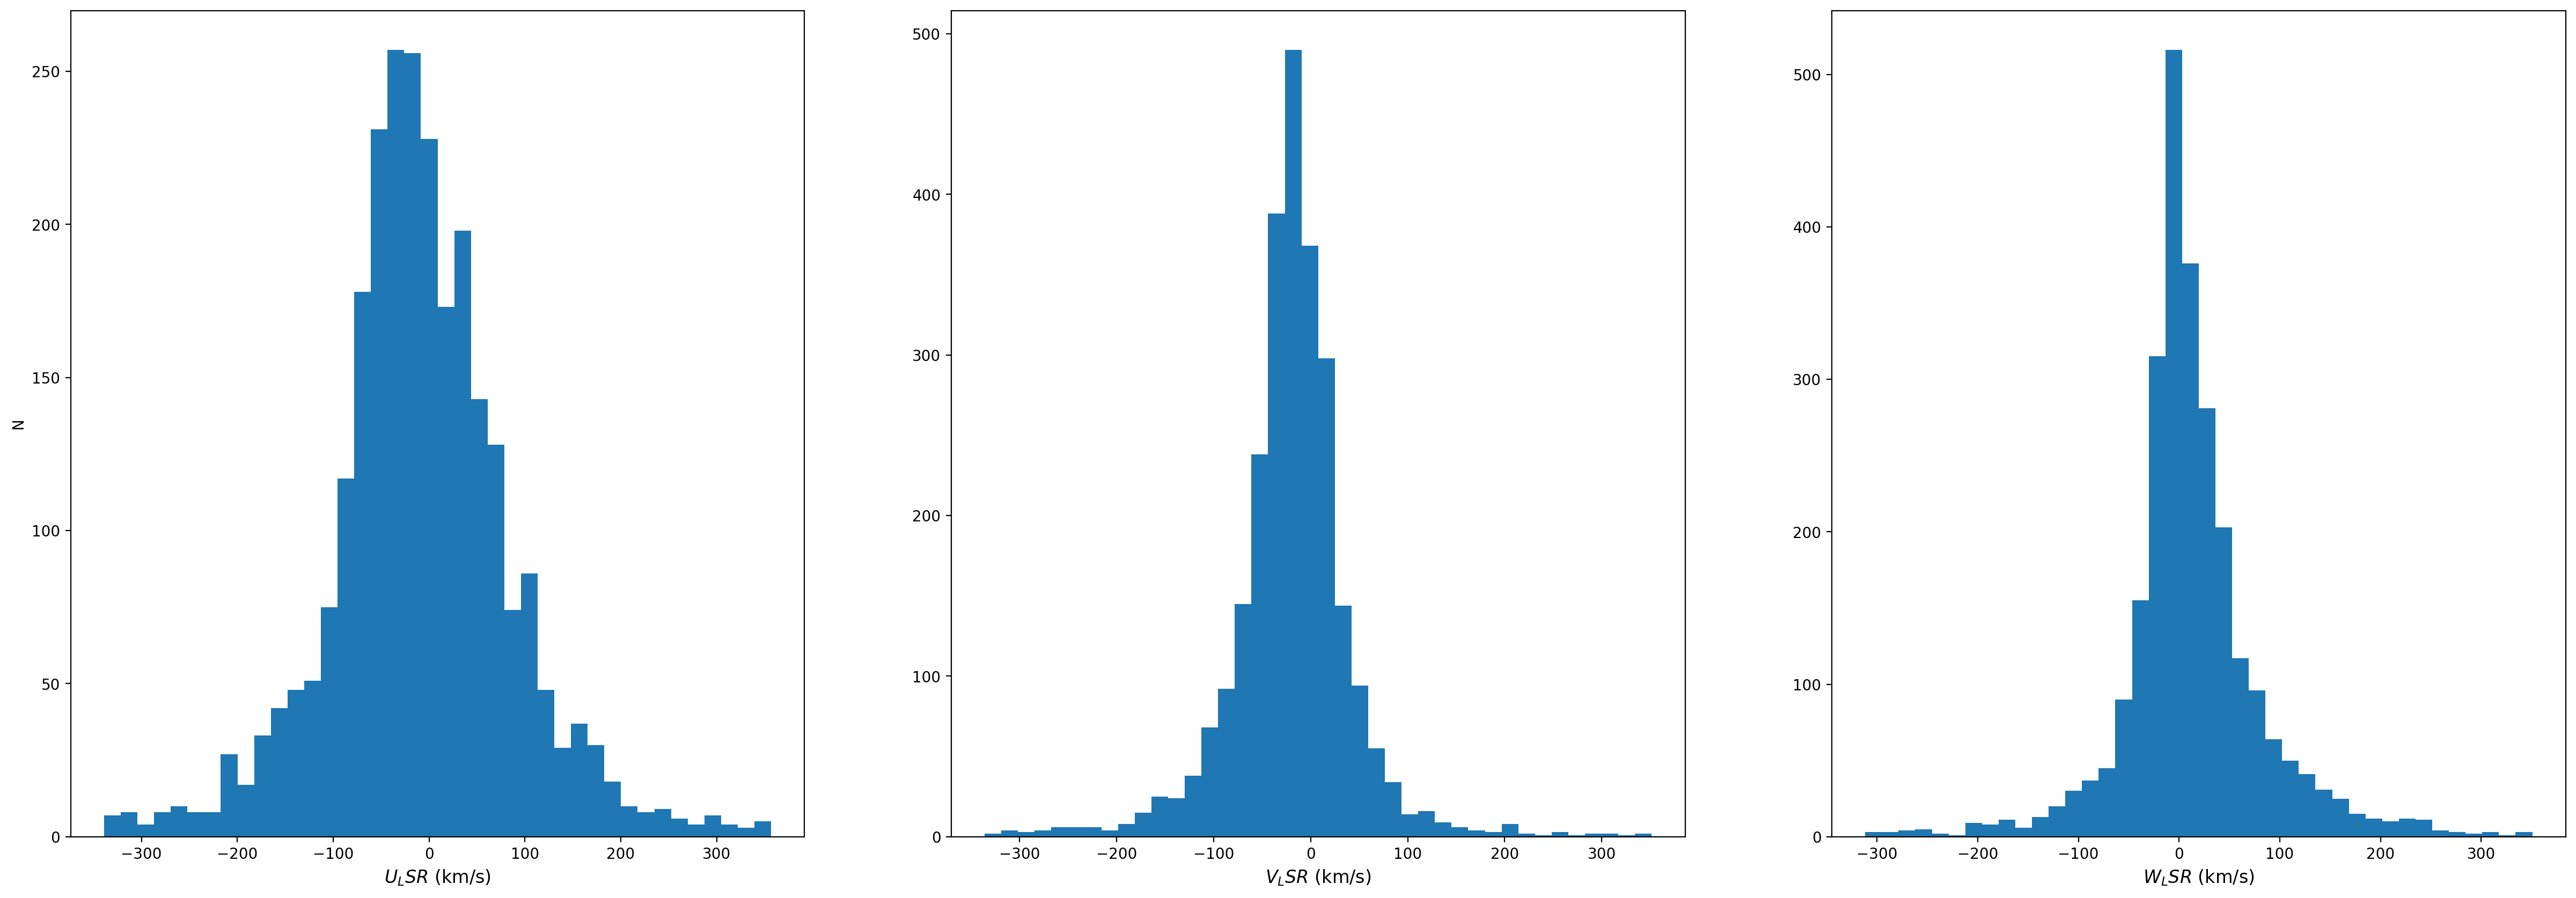

Halo


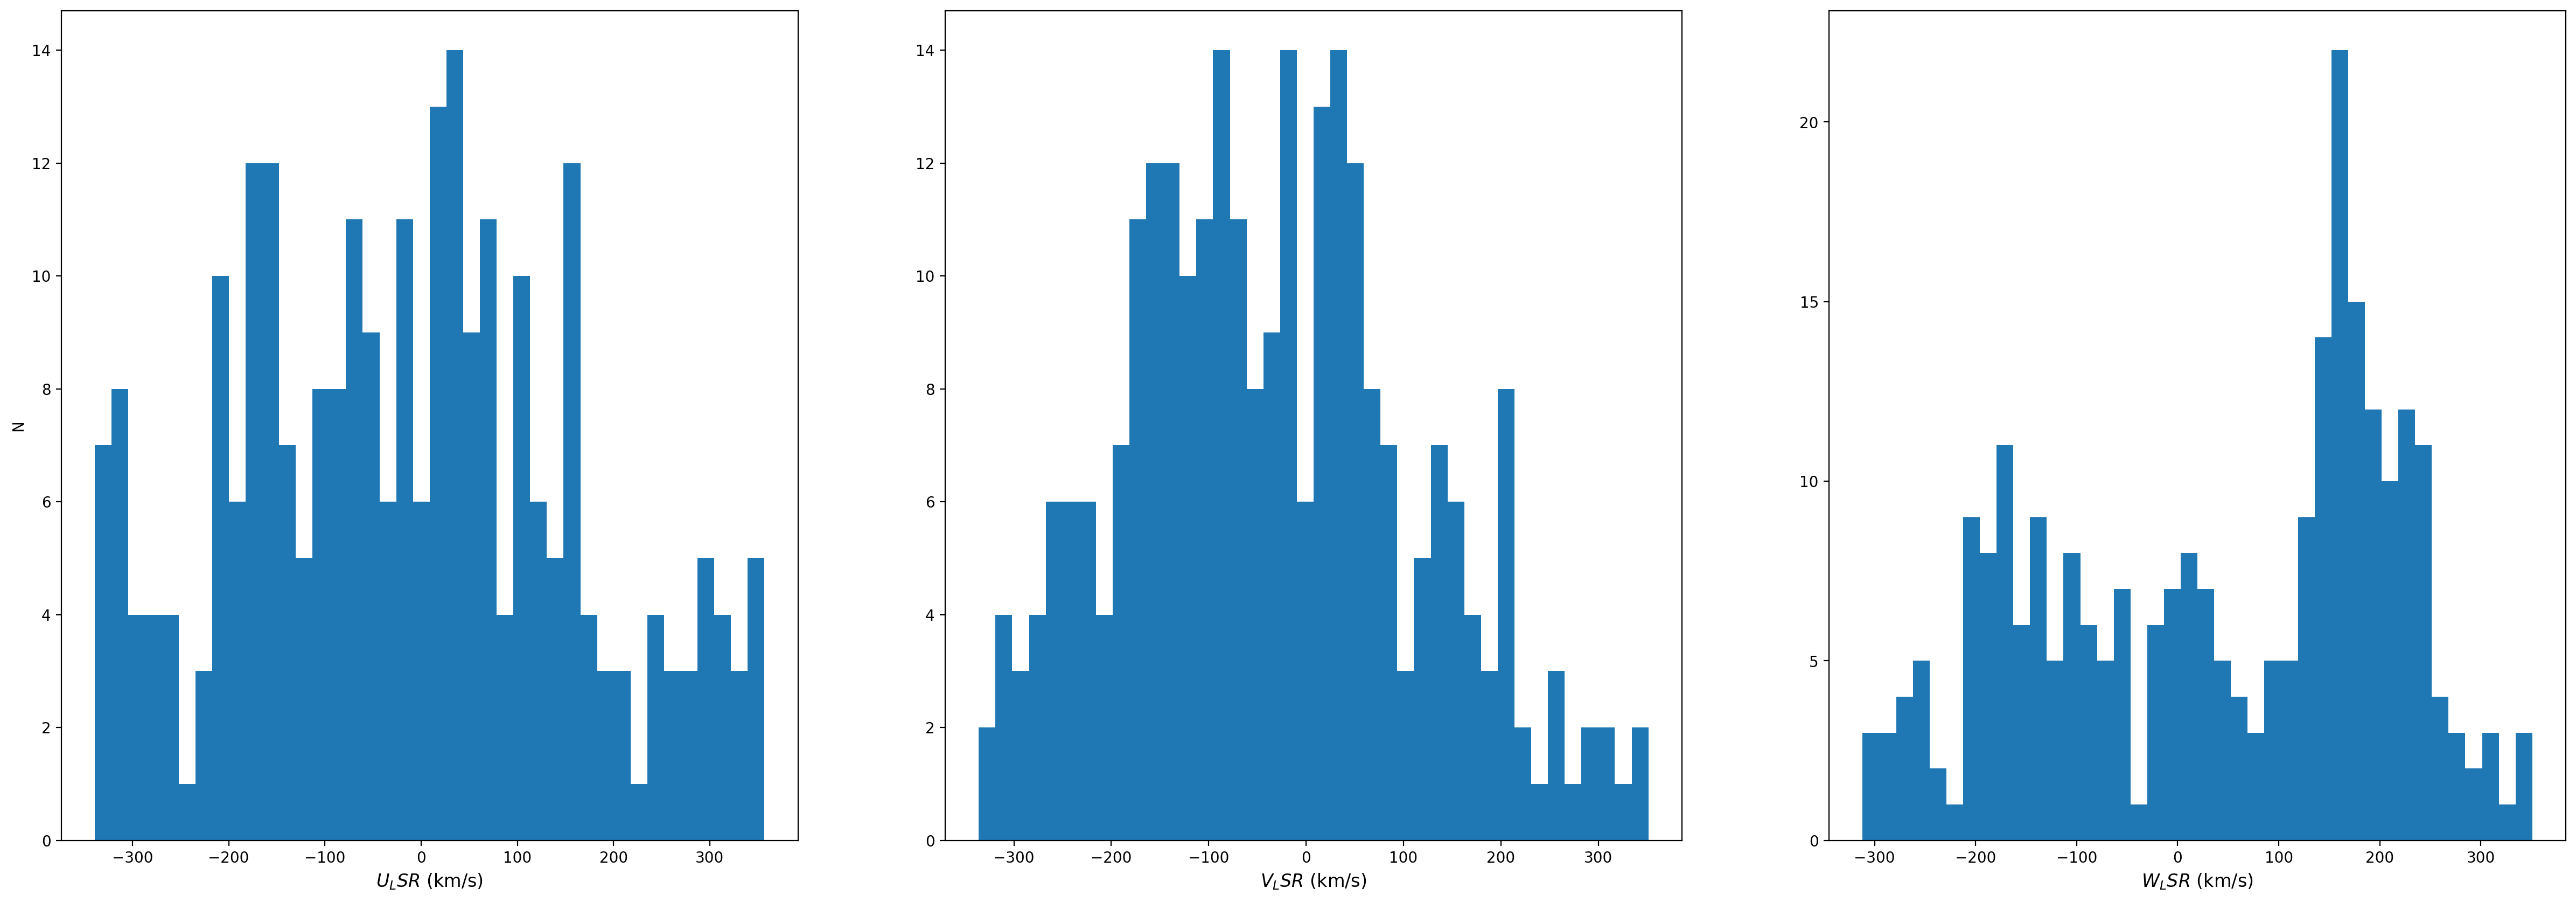

Thin Disk


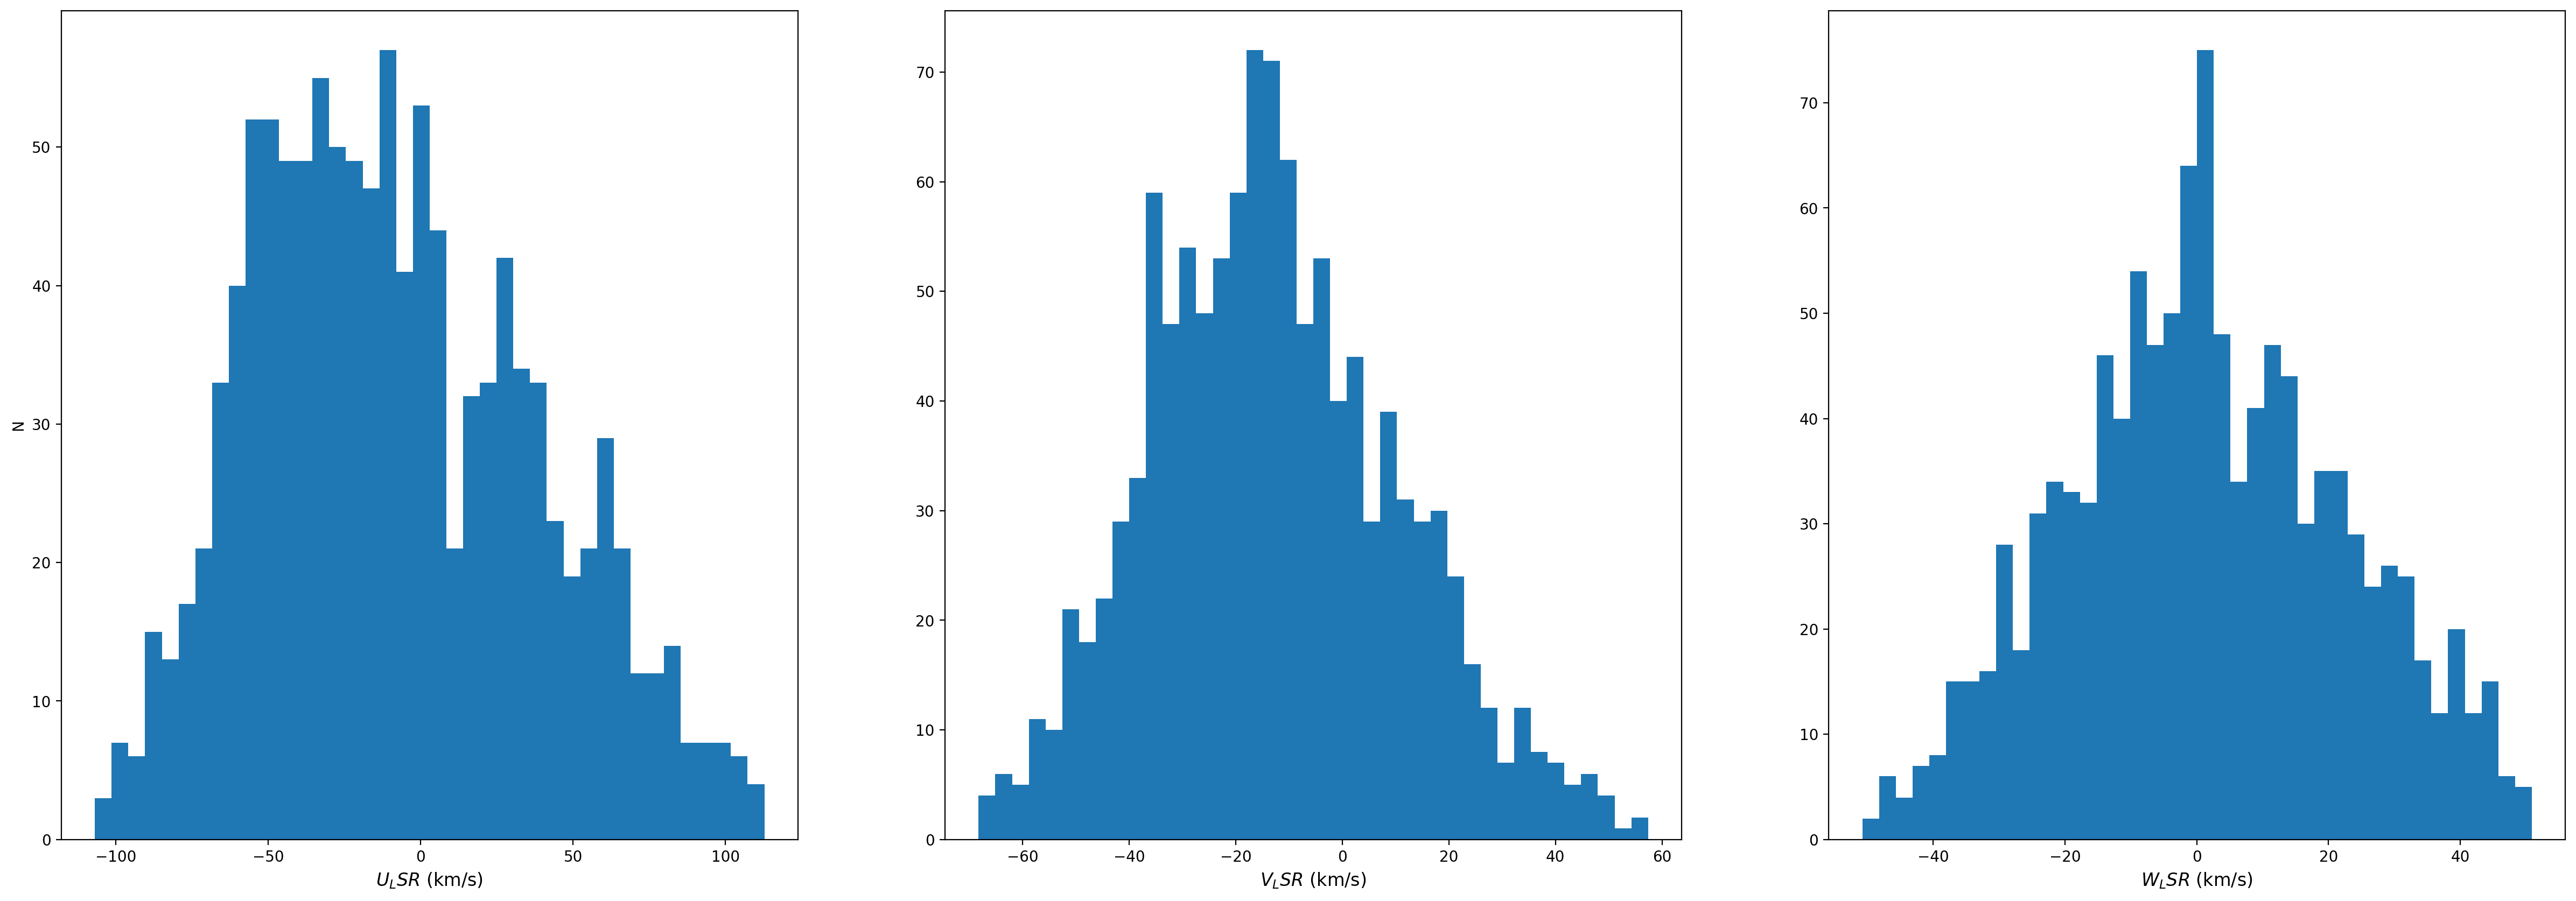

Thick Disk


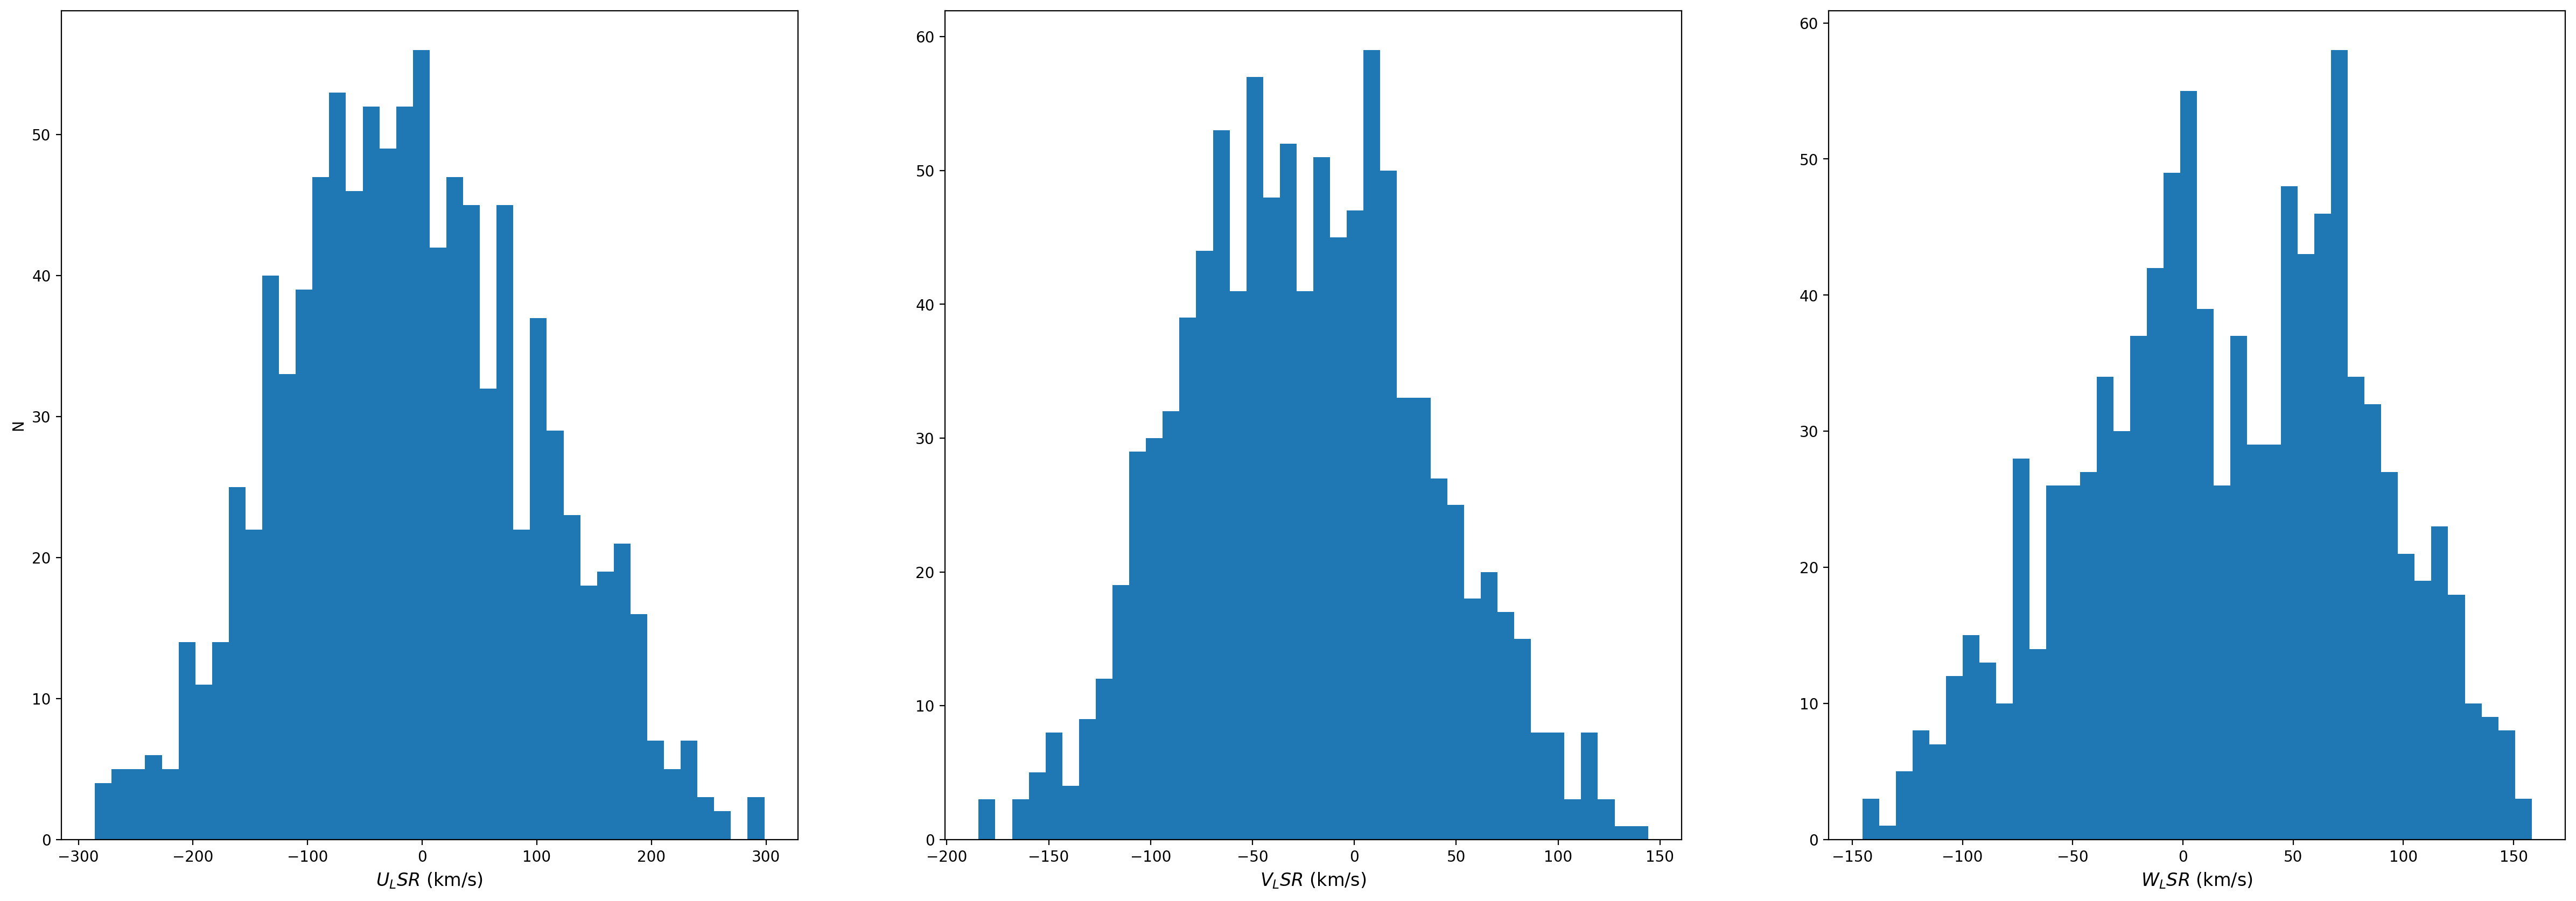

Bukan bagian Halo, Thick, dan Thin


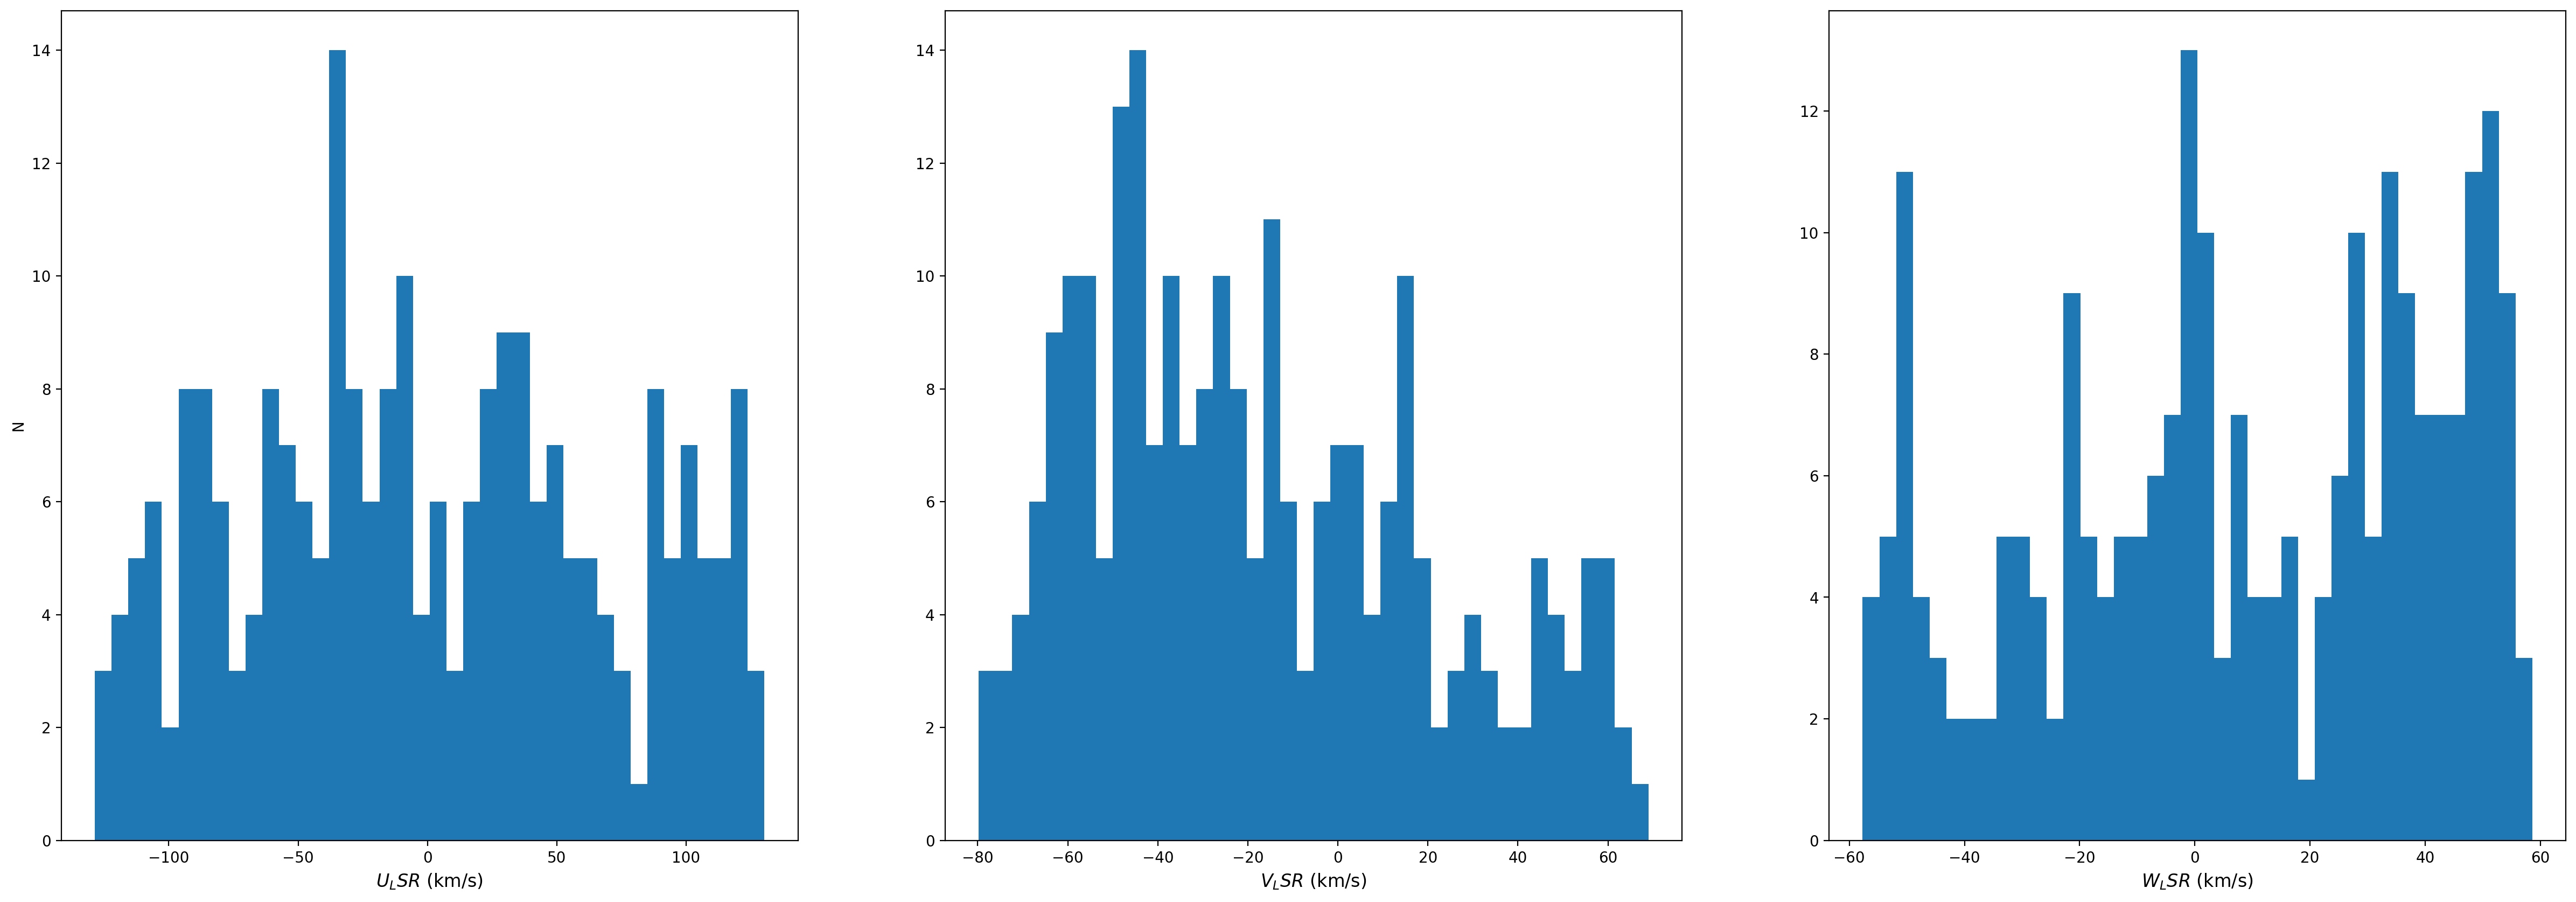

In [ ]:
## D. Histogram

#plot histogram Keseluruhan
print ("Keseluruhan")
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(data['U_LSR'], bins=40)
ax[0].set_xlabel(r'$U_LSR$ (km/s)', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(data['V_LSR'], bins=40)
ax[1].set_xlabel(r'$V_LSR$ (km/s)', fontsize=12)

ax[2].hist(data['W_LSR'], bins=40)
ax[2].set_xlabel(r'$W_LSR$ (km/s)', fontsize=12)
plt.show()


#plot histogram halo
print ("Halo")
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(dfh['U_LSR'], bins=40)
ax[0].set_xlabel(r'$U_LSR$ (km/s)', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(dfh['V_LSR'], bins=40)
ax[1].set_xlabel(r'$V_LSR$ (km/s)', fontsize=12)

ax[2].hist(dfh['W_LSR'], bins=40)
ax[2].set_xlabel(r'$W_LSR$ (km/s)', fontsize=12)
plt.show()


#plot histogram thin disk
print("Thin Disk")
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(dfd['U_LSR'], bins=40)
ax[0].set_xlabel(r'$U_LSR$ (km/s)', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(dfd['V_LSR'], bins=40)
ax[1].set_xlabel(r'$V_LSR$ (km/s)', fontsize=12)

ax[2].hist(dfd['W_LSR'], bins=40)
ax[2].set_xlabel(r'$W_LSR$ (km/s)', fontsize=12)
plt.show()


# plot histogram thick disk
print ("Thick Disk")
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(dft['U_LSR'], bins=40)
ax[0].set_xlabel(r'$U_LSR$ (km/s)', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(dft['V_LSR'], bins=40)
ax[1].set_xlabel(r'$V_LSR$ (km/s)', fontsize=12)

ax[2].hist(dft['W_LSR'], bins=40)
ax[2].set_xlabel(r'$W_LSR$ (km/s)', fontsize=12)
plt.show()

# plot histogram yang lain
print ("Bukan bagian Halo, Thick, dan Thin")
fig, ax = plt.subplots(1, 3, dpi=200, figsize=(30,10))

ax[0].hist(dfl['U_LSR'], bins=40)
ax[0].set_xlabel(r'$U_LSR$ (km/s)', fontsize=12)
ax[0].set_ylabel('N')

ax[1].hist(dfl['V_LSR'], bins=40)
ax[1].set_xlabel(r'$V_LSR$ (km/s)', fontsize=12)

ax[2].hist(dfl['W_LSR'], bins=40)
ax[2].set_xlabel(r'$W_LSR$ (km/s)', fontsize=12)
plt.show()